In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: imbalanced-learn


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('aug_train.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [65]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
18931,17729,city_103,0.920,Male,No relevent experience,no_enrollment,High School,NaN,6,NaN,NaN,1,85,1.0
182,29226,city_104,0.924,Male,No relevent experience,Full time course,High School,NaN,6,NaN,NaN,never,15,0.0
7415,22461,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,4,50-99,Funded Startup,2,30,1.0
9399,14450,city_21,0.624,NaN,Has relevent experience,Full time course,Masters,STEM,15,10000+,NaN,2,96,1.0
807,9337,city_126,0.479,NaN,Has relevent experience,Full time course,Graduate,STEM,5,NaN,Public Sector,1,4,0.0


In [66]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [67]:
cats = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
nums = ['city_development_index','training_hours','target']

In [32]:
df[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


karena kolom `city` dan `experience` memiliki unique value yg banyak, maka bisa di drop

In [68]:
df = df.drop(columns='city')
df = df.drop(columns='experience')

## A. Handle missing values

In [69]:
df.isna().sum()

enrollee_id                  0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

1. Terdapat kolom yang memiliki nilai kosong yaitu pada kolom `gender`, `enrolled_university`, `education_level`, `major_disciplin`, `experience`, `company_size`, `company_type`, dan `last_new_job`

* `enrolled_university`, `education_level`, & `last_new_job` dapat di drop karena jumlahnya kecil (dibawah 5% dari jumlah total baris)
* `gender`: impute dengan nilai modus (Male)
* `major_discipline`: impute dengan nilai modus (STEM)
* `company_size`: impute dengan nilai modus (50-99)
* `company_type`: impute dengan nilai modus (Pvt Ltd)

In [70]:
df = df.dropna(subset=['enrolled_university','education_level','last_new_job'])
df.isna().sum()

enrollee_id                  0
city_development_index       0
gender                    3883
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2223
company_size              5318
company_type              5488
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [71]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['major_discipline'].fillna(df['major_discipline'].mode()[0], inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0], inplace=True)
df['company_type'].fillna(df['company_type'].mode()[0], inplace=True)

In [72]:
df.isna().sum()

enrollee_id               0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

## B. Handle duplicated data

In [73]:
df.duplicated().sum()

0

Tidak ada data yang duplicate pada dataset HR Analytics

## C. Handle outliers

In [74]:
from scipy import stats

In [75]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 18044
Jumlah baris setelah memfilter outlier: 17605


## D. Feature transformation

karena kolom `city_development_index` dan `training_hours` skew sehingga perlu dilakukan log transformation

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

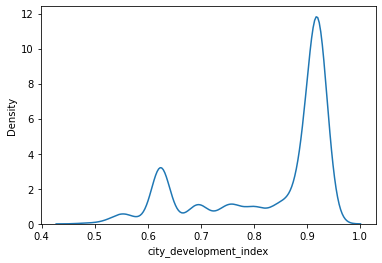

In [76]:
sns.kdeplot(df['city_development_index'])

In [77]:
from scipy.stats import skewnorm

<AxesSubplot:ylabel='Density'>

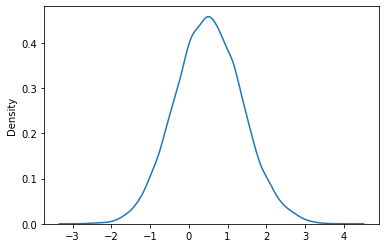

In [78]:
sns.kdeplot(skewnorm.rvs(df['city_development_index'])) #berhasil menggunakan skewnorm

In [79]:
df['skewnorm_city_development_index'] = skewnorm.rvs(df['city_development_index'])
df = df.drop(columns='city_development_index')

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

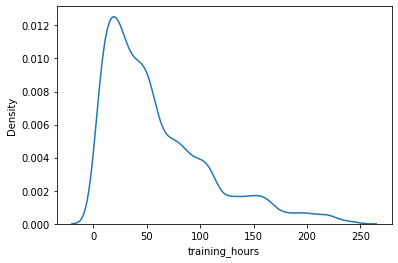

In [80]:
sns.kdeplot(df['training_hours'])

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

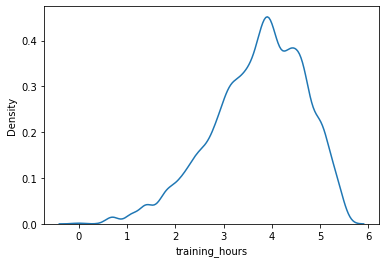

In [81]:
sns.kdeplot(np.log(df['training_hours']))

In [82]:
df['log_training_hours'] = np.log(df['training_hours'])
df = df.drop(columns='training_hours')

In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['log_training_hours_std'] = StandardScaler().fit_transform(df['log_training_hours'].values.reshape(len(df), 1))
df['skewnorm_city_development_index_std'] = StandardScaler().fit_transform(df['skewnorm_city_development_index'].values.reshape(len(df), 1))

In [84]:
df.describe()

,enrollee_id,target,skewnorm_city_development_index,log_training_hours,log_training_hours_std,skewnorm_city_development_index_std
count,17605.000000,17605.000000,17605.000000,17605.000000,1.760500e+04,1.760500e+04
mean,16903.373701,0.246294,0.501185,3.716371,3.900317e-16,2.699094e-17
std,9661.905849,0.430864,0.862124,0.951938,1.000028e+00,1.000028e+00
min,1.000000,0.000000,-2.896468,0.000000,-3.904117e+00,-3.941139e+00
25%,8535.000000,0.000000,-0.080818,3.135494,-6.102215e-01,-6.750998e-01
50%,17023.000000,0.000000,0.484870,3.828641,1.179426e-01,-1.892452e-02
75%,25317.000000,0.000000,1.073822,4.430817,7.505392e-01,6.642364e-01
max,33380.000000,1.000000,4.615778,5.497168,1.870761e+00,4.772760e+00


### E. Feature encoding

In [85]:
cats_updated = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column gender
Male      16252
Female     1182
Other       171
Name: gender, dtype: int64
------------------------------ 

value counts of column relevent_experience
Has relevent experience    12891
No relevent experience      4714
Name: relevent_experience, dtype: int64
------------------------------ 

value counts of column enrolled_university
no_enrollment       13049
Full time course     3444
Part time course     1112
Name: enrolled_university, dtype: int64
------------------------------ 

value counts of column education_level
Graduate          10931
Masters            4140
High School        1862
Phd                 388
Primary School      284
Name: education_level, dtype: int64
------------------------------ 

value counts of column major_discipline
STEM               15836
Humanities           641
Other                359
Business Degree      316
Arts                 246
No Major             207
Name: major_discipline, dtype: int64
------------------------------ 

In [94]:
# menghapus Other pada feature Gender karena tidak relate dengan gender manapun dan nilainya kecil sehingga bisa didrop, sehingga gender bisa Label Encoding
df = df[ ~(df['gender'] == 'Other')]
df

,enrollee_id,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,target,skewnorm_city_development_index,log_training_hours,log_training_hours_std,skewnorm_city_development_index_std
0,8949,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,1,1.0,-0.378943,3.583519,-0.139563,-1.020912
1,29725,Male,No relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,>4,0.0,-0.864646,3.850148,0.140535,-1.584308
2,11561,Male,No relevent experience,Full time course,Graduate,STEM,50-99,Pvt Ltd,never,0.0,1.020215,4.418841,0.737958,0.602054
4,666,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Funded Startup,4,0.0,2.444795,2.079442,-1.719625,2.254509
5,21651,Male,Has relevent experience,Part time course,Graduate,STEM,50-99,Pvt Ltd,1,1.0,-0.469737,3.178054,-0.565512,-1.126230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,Male,No relevent experience,no_enrollment,Graduate,Humanities,50-99,Pvt Ltd,1,1.0,0.796149,3.737670,0.022375,0.342147
19154,31398,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,4,1.0,0.522035,3.951244,0.246739,0.024185
19155,24576,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,4,0.0,0.662042,3.784190,0.071245,0.186588
19156,5756,Male,Has relevent experience,no_enrollment,High School,STEM,500-999,Pvt Ltd,2,0.0,1.327812,4.574711,0.901703,0.958854


In [95]:
df['gender'].value_counts()

Male      16252
Female     1182
Name: gender, dtype: int64

* `gender`, `relevent_experience`, `enrolled_university`, & `education_level`: Label encoding
* `major_discipline`, `company_size`, `company_type`, `last_new_job`: One Hot Encoding

In [96]:
mapping_gender = {
    'Male' : 0,
    'Female' : 1
}

mapping_pengalaman = {
    'No relevent experience' : 0,
    'Has relevent experience' : 1
}

mapping_enrolled_university = {
    'no_enrollment' : 0,
    'Part time course' : 1,
    'Full time course' : 2
}

mapping_pendidikan = {
    'Primary School' : 0,
    'High School' : 1,
    'Graduate' : 2,
    'Masters' : 3,
    'Phd' : 4
}

df['gender'] = df['gender'].map(mapping_gender)
df['relevent_experience'] = df['relevent_experience'].map(mapping_pengalaman)
df['enrolled_university'] = df['enrolled_university'].map(mapping_enrolled_university)
df['education_level'] = df['education_level'].map(mapping_pendidikan)

In [97]:
for cat in ['major_discipline', 'company_size', 'company_type', 'last_new_job']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [98]:
# drop kolom major_discipline, company_size, company_type, last_new_job yang asli (karena sudah di-encoding)
df = df.drop(columns=['major_discipline','company_size','company_type', 'last_new_job',])

In [99]:
df

,enrollee_id,gender,relevent_experience,enrolled_university,education_level,target,skewnorm_city_development_index,log_training_hours,log_training_hours_std,skewnorm_city_development_index_std,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0,1,0,2,1.0,-0.378943,3.583519,-0.139563,-1.020912,...,0,0,0,1,1,0,0,0,0,0
1,29725,0,0,0,2,0.0,-0.864646,3.850148,0.140535,-1.584308,...,0,0,0,1,0,0,0,0,1,0
2,11561,0,0,2,2,0.0,1.020215,4.418841,0.737958,0.602054,...,0,0,0,1,0,0,0,0,0,1
4,666,0,1,0,3,0.0,2.444795,2.079442,-1.719625,2.254509,...,0,0,0,0,0,0,0,1,0,0
5,21651,0,1,1,2,1.0,-0.469737,3.178054,-0.565512,-1.126230,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0,0,0,2,1.0,0.796149,3.737670,0.022375,0.342147,...,0,0,0,1,1,0,0,0,0,0
19154,31398,0,1,0,2,1.0,0.522035,3.951244,0.246739,0.024185,...,0,0,0,1,0,0,0,1,0,0
19155,24576,0,1,0,2,0.0,0.662042,3.784190,0.071245,0.186588,...,0,0,0,1,0,0,0,1,0,0
19156,5756,0,1,0,1,0.0,1.327812,4.574711,0.901703,0.958854,...,0,0,0,1,0,1,0,0,0,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17434 entries, 0 to 19157
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   enrollee_id                          17434 non-null  int64  
 1   gender                               17434 non-null  int64  
 2   relevent_experience                  17434 non-null  int64  
 3   enrolled_university                  17434 non-null  int64  
 4   education_level                      17434 non-null  int64  
 5   target                               17434 non-null  float64
 6   skewnorm_city_development_index      17434 non-null  float64
 7   log_training_hours                   17434 non-null  float64
 8   log_training_hours_std               17434 non-null  float64
 9   skewnorm_city_development_index_std  17434 non-null  float64
 10  major_discipline_Arts                17434 non-null  uint8  
 11  major_discipline_Business De

In [101]:
df['target'].value_counts()

0.0    13141
1.0     4293
Name: target, dtype: int64

### F. Handle class imbalance

In [102]:
# pembuatan binary label target
df['target_class'] = df['target'] > 0.8
df['target_class'].value_counts()

False    13141
True      4293
Name: target_class, dtype: int64

In [103]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['target', 'target_class']]]
y = df['target_class'].values
print(X.shape)
print(y.shape)

(17434, 35)
(17434,)


In [104]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

C:\Users\Satya Mahardika\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
C:\Users\Satya Mahardika\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
C:\Users\Satya Mahardika\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [105]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    13141
True      4293
dtype: int64


UNDERSAMPLING
False    8586
True     4293
dtype: int64


OVERSAMPLING
False    13141
True      6570
dtype: int64


SMOTE
False    13141
True      6570
dtype: int64


# 2. Feature Engineering

### A. Feature selection

Pada feature ini kami menghapus kolom `city` & `experince` dikarenakan nilai unique yang 
terlalu tinggi.

### B. Feature extraction

Kami tidak membuat feature baru dari feature yang sudah ada

### C. Tuliskan minimal 4 feature tambahan

Kami akan menambahkan 4 feature baru seperti:
* Perfomace rating
* Age
* Training score
* Ekspetasi gaj